# K-Means
    => Common clustering technique,helps to solve many problems efficiently.
    => K-means is an example of Hard-Clustering, Where every point belongs only to one cluster.

## Motivation Problem - Pizza Parlour Study

In [ ]:
Problem Statement :- Given the list of locations of customers who frequently order Pizza we want to find out optimal locations of Pizza Parlours where they should be opened.
Solution steps:= i> Initialize Pizza Parlour Centor randomly.
                ii> Assign each customer to its nearest Pizza Center.
               iii> Update the Center Location by taking mean of customers assigned to it.
                iv> Repeat Steps 2 and 3 Until Convergence.

#### K-Means Algorithm


In [ ]:
Input Data : X = {x1,x2....xN}
Goal : Partition the data among some K number of clusters. Let us assume K is known to us.

Let uK denote the center of Kth Cluster (uK will be vector)

So we need to find an assignment of data points to clusters, as well as a set of cluster centers(uK), such that 
the sum of the squares of the distances of each data point to its closest cluster center uK, is a minimus.

## Implementation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

### Dataset Preparation

In [ ]:
# see documantation of make_blobs
X,y = make_blobs?

In [81]:
X,y = make_blobs(n_samples=500,centers=5,random_state=3)

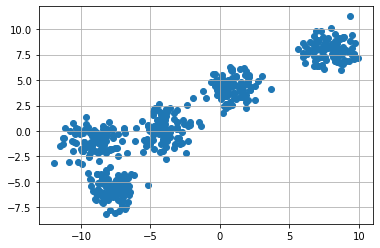

In [82]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:,0],X[:,1])
plt.show()

In [83]:
k = 5

color = ["green","red","blue","yellow","orange"]

clusters = {}

for kx in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[kx]
    }
    clusters[kx] = cluster
    
    
    
    

In [ ]:
#print(clusters)

In [84]:
# Eucledian distance
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [85]:
# Assign every data points to one of the clusters

def assignPointToClusters(clusters):# E-step => Populate the cluster as expected cluster
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
    
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        
        current_cluster = np.argmin(dist)
    
        clusters[current_cluster]['points'].append(curr_x)
    
def updateClusters(clusters):# M-step -> We update every cluster center according to the mean of points
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: # If a cluster has some-nonzero points
                new_u = pts.mean(axis=0)
                clusters[kx]['center'] = new_u
                clusters[kx]['points'] = [] # Clear the list

def plotClusters(clusters):
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        #print(pts.shape)
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        #Plot the cluster centers
        uK = clusters[kx]['center']
        plt.scatter(uK[0],uK[1],color='black',marker='*')
        
        

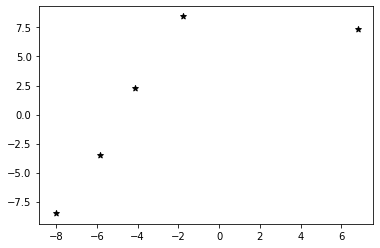

In [87]:
plotClusters(clusters)

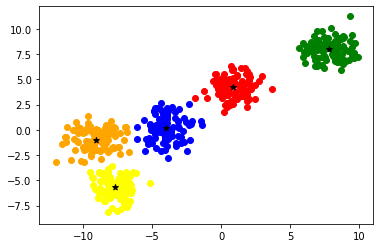

In [97]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)
# Repeate above three steps several times to get well organised clusters

# K-Means ++

In [ ]:
# It overcomes the drawback of K-means which used to stuck into local minima

In [ ]:
#SciKit Learn uses K-Means++ by default option

## Using Sci-Kit Learn

In [98]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [99]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [100]:
from sklearn.cluster import KMeans

In [106]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [110]:
centers = kmeans.cluster_centers_

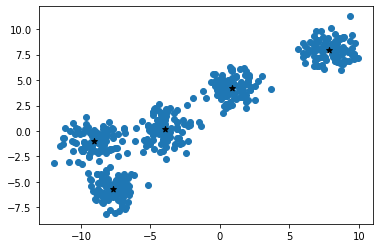

In [112]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.show()

In [114]:
# Predictions
pred = kmeans.labels_
print(pred)

[3 2 4 3 3 4 1 3 2 3 2 4 2 3 4 3 2 3 3 2 0 0 3 4 3 0 1 1 4 1 3 1 0 0 3 0 2
 2 3 0 0 0 1 1 4 2 2 1 1 1 2 3 1 3 3 0 3 3 2 4 2 4 4 3 1 2 4 4 0 4 0 3 0 3
 0 4 3 1 0 0 4 0 4 1 2 1 4 2 1 4 1 0 3 0 0 2 3 4 4 0 2 0 4 4 2 2 2 4 4 3 2
 1 3 2 4 0 2 1 0 4 2 4 1 3 0 1 1 1 3 3 4 4 3 2 2 1 4 1 4 3 3 0 4 2 1 3 2 2
 3 4 3 3 4 4 2 0 0 1 4 3 0 2 1 0 2 0 2 0 0 0 1 3 0 2 0 1 3 4 2 1 2 3 2 0 1
 1 0 3 4 2 0 4 1 3 1 0 4 1 3 3 3 0 0 2 3 1 1 3 2 3 3 3 0 2 4 2 3 3 2 1 4 1
 1 0 3 4 3 4 1 0 4 4 3 0 3 0 4 2 4 0 0 2 3 3 4 4 0 2 0 3 1 2 1 3 1 1 1 1 2
 0 2 3 0 2 1 4 2 2 2 1 3 3 4 0 0 2 4 4 3 4 1 4 2 2 1 1 0 1 1 2 0 3 4 0 4 1
 4 4 2 3 0 2 0 0 3 1 0 4 0 1 3 3 4 2 0 1 2 0 4 1 2 1 3 0 1 4 4 0 0 0 3 1 0
 3 2 4 4 1 2 2 4 4 1 0 0 0 3 1 2 1 3 0 2 2 4 0 0 1 0 1 4 4 4 1 0 3 0 4 1 1
 2 3 2 1 3 1 4 2 0 2 4 3 3 2 2 0 2 0 1 4 2 1 3 3 2 4 0 1 3 3 3 1 2 0 2 2 2
 1 0 4 2 4 4 1 4 3 4 3 2 0 0 3 2 1 3 0 4 2 1 4 1 1 2 1 4 1 2 1 4 1 3 0 0 1
 0 2 0 0 1 3 3 4 1 0 4 1 4 2 4 2 3 0 4 3 4 3 3 0 3 0 1 2 2 4 3 3 1 1 2 1 1
 2 1 2 2 2 1 0 1 4 2 4 4 

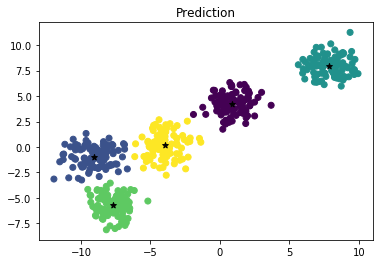

In [116]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.title("Prediction")
plt.show()

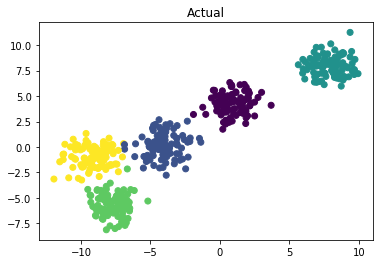

In [117]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.show()

# K-Means and DBSCAN

In [119]:
from sklearn.datasets import make_circles,make_moons

In [120]:
X,Y = make_moons(n_samples=200,noise=0.10)

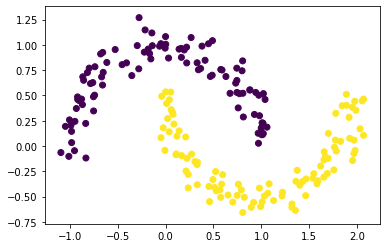

In [122]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [125]:
# We have to identify the data which is linearly inseperable via clustering
from sklearn.cluster import KMeans

In [126]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

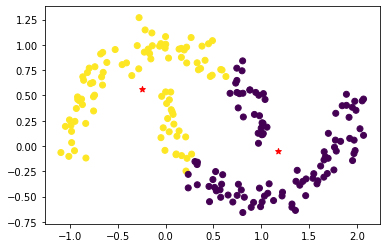

In [131]:
centers = km.cluster_centers_
label = km.labels_

plt.scatter(X[:,0],X[:,1],c=label)
plt.scatter(centers[:,0],centers[:,1],color="red",marker='*')
plt.show()

In [ ]:
# We can clearly see that our KMeans algorithm is not giving the desired result
# We will now learn about DBSCAN to solve thsi kind of problems

# DBSCAN


=> Density Based Spatial Clustering of Applications with Noise
=> Based upon on the idea, that a cluster is a high density area surrounded by a low density region.
=> Starts by exploring a small area, if density is "good enough" it considered as part of cluster, and 
   explores neighbours and so on, so it groups regions based upon density!

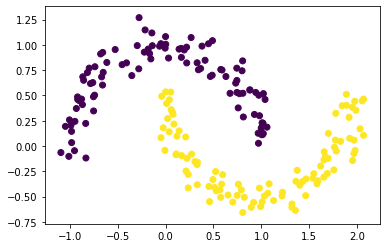

In [132]:
# Our dataset
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [134]:
from sklearn.cluster import DBSCAN

In [147]:
dbs = DBSCAN(eps=0.2,min_samples=8)
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [148]:
Ypred = dbs.fit_predict(X)
print(Ypred)

[ 0  0  0  1  0  0  0  1  0  1  2  0  1  1  0  3  1  0  1  1  1  1  1  1
  1  2  1  0  2  2  2  0  2  1  2  2  0  0  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  0  2  0  0  2  1  1  0  1  1  0  0  0  1  2  2  1  0  0
  3  1  0  0  1  1  0  1  1  0  2  1  1  0  1  1  1  2  1  1  1  1  0  1
  1  0 -1  2  0  1  2  2  1  1  0  2  2  0  1  2  1  0 -1  1  0  0  1  1
  0  1  0  1  1  1  0  1 -1  1  0  1  1  1  3  3  1  1  1  3  3  3  0  0
  3  1  1  1  1  0  0  2  2  1  2  0  0  0  1  2  1  0  2  0  2  1  1  3
  0  0  1  2  0  0  1  0  1  1  2  0 -1  0  1  2  0  1  0  1  0  2  3 -1
  1  2  2  1  0  1  0  0]


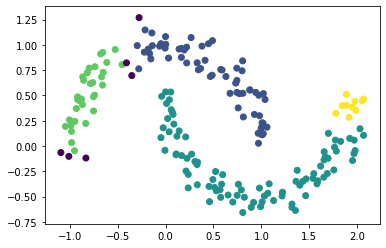

In [149]:
plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.show()

In [150]:
# Learn more about DBSCAN , where to used with examples

# Dominant Color Extraction for Image Segmentation
    =>Image Segmentation
    =>Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
    =>We will try to extract the most dominant 'K' Colors using K-Means
    =>We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [39]:
im = cv2.imread('img.jpg') # Reads an image as BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(1280, 1124, 3)


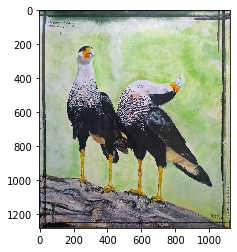

In [40]:
plt.imshow(im)
plt.show()

In [41]:
# We will Flatten each channel of the image
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(1438720, 3)


In [5]:
from sklearn.cluster import KMeans

In [42]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
centers = km.cluster_centers_ # foating valure centers
centers

array([[197.21886486, 206.87269925, 184.8363108 ],
       [ 42.27224487,  43.18334321,  46.27118876],
       [107.34896585, 105.36547129,  98.59030339],
       [166.72688396, 182.2627802 , 140.41424605]])

In [44]:
# converting centers into integer
centers = np.array(centers,dtype='uint8')
print(centers)

[[197 206 184]
 [ 42  43  46]
 [107 105  98]
 [166 182 140]]


### Plot what all colors are thesed?

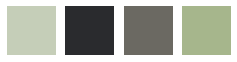

In [45]:
#Extracting 4 most dominant color of our image
i = 1
plt.figure(0,figsize=(4,2))

colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()
    

### Segmenting Our Original Image

In [46]:
new_img = np.zeros((1124*1280,3),dtype='uint8')

print(new_img.shape)

(1438720, 3)


In [47]:
colors

[array([197, 206, 184], dtype=uint8),
 array([42, 43, 46], dtype=uint8),
 array([107, 105,  98], dtype=uint8),
 array([166, 182, 140], dtype=uint8)]

In [48]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1])

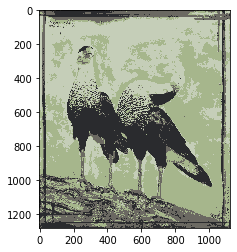

In [49]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

In [ ]:
# We can see that we habe extracted the colors from original image